# MNistBayes Analysis

Author: Sayemum Hassan

Version: 10/5/2024

## Load and Prepare Data

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from nb_classifier import NBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Load MNIST dataset
X_train = np.load('MNIST_X_train.npy')
X_test = np.load('MNIST_X_test.npy')
y_train = np.load('MNIST_y_train.npy')
y_test = np.load('MNIST_y_test.npy')

# Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create the categorical flag array (False for all features as they are continuous)
X_categorical = np.array([False] * X_train.shape[1])

## Build Naive Bayes Model

In [36]:
# Initialize NB
nb = NBClassifier(smoothing_flag=True)
nb.fit(X_train, X_categorical, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Evaluate model
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5639


## Confusion Matrix

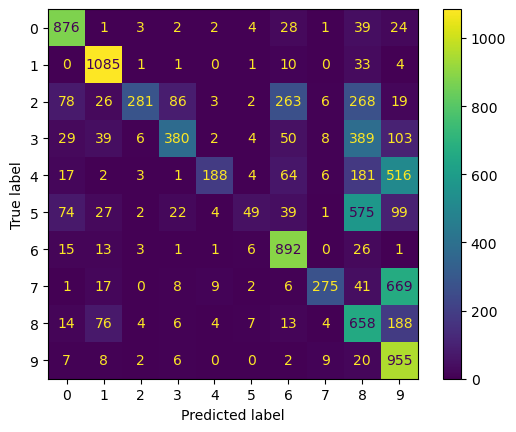

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

## Visualizations

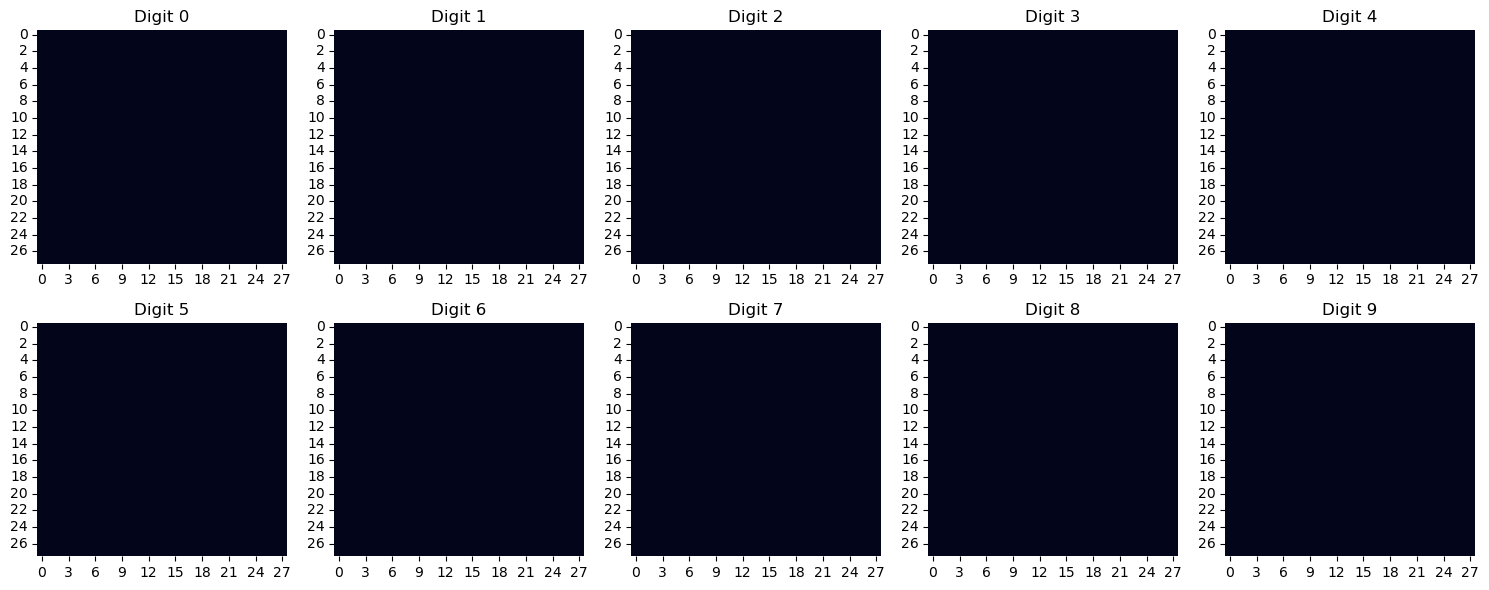

In [38]:
def plot_heatmap_for_digit(nb, digit, ax):
    mu_values = nb.feature_dists[digit]
    heatmap_data = np.zeros((28, 28))
    for i in range(28 * 28):
        mean, _ = mu_values[digit]
        heatmap_data[i // 28, i % 28] = mean
    sns.heatmap(heatmap_data, ax=ax, cbar=False)
    ax.set_title(f'Digit {digit}')

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for digit in range(10):
    plot_heatmap_for_digit(nb, digit, axs[digit // 5, digit % 5])

plt.tight_layout()
plt.show()

## Results



Mean values for digit 0 (first 10 values): [(0.5179236359466428, 0.1), (0.2750321632409237, 0.1), (0.012281683216014083, 0.1), (0.3716816008430147, 0.1), (0.11258495160281479, 0.1), (0.4745317946856915, 0.1), (0.8996265704582742, 0.1), (0.20408256485591725, 0.1), (0.6108039815479999, 0.1), (0.10691591684228963, 0.1)]
Mean values for digit 1 (first 10 values): [(0.7432269593607951, 0.1), (0.7393112837085049, 0.1), (0.8656556066428052, 0.1), (0.2531813524799823, 0.1), (0.9085119320334595, 0.1), (0.11035095773621395, 0.1), (0.3906748249993274, 0.1), (0.8008210622356958, 0.1), (0.16797198063208307, 0.1), (0.7040372931598119, 0.1)]
Mean values for digit 2 (first 10 values): [(0.3253418527126051, 0.1), (0.060613255638961916, 0.1), (0.23843860303090525, 0.1), (0.6696588816708402, 0.1), (0.09211342857522942, 0.1), (0.01446392200724178, 0.1), (0.44074225128805433, 0.1), (0.9729623584392663, 0.1), (0.15264068961483834, 0.1), (0.9051926754956025, 0.1)]
Mean values for digit 3 (first 10 values): [

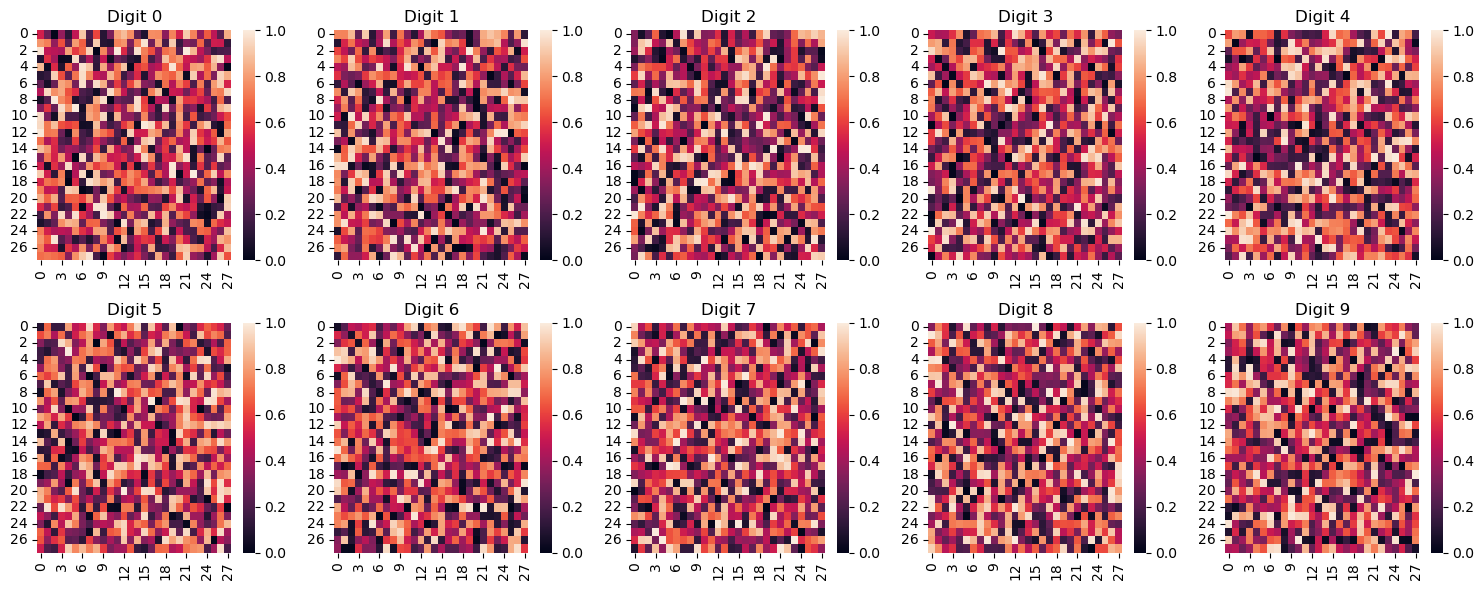

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_for_digit(nb, digit, ax):
    mu_values = nb.feature_dists[digit]
    print(f"Mean values for digit {digit} (first 10 values):", mu_values[:10])  # Debugging line
    heatmap_data = np.zeros((28, 28))
    for i in range(28 * 28):
        mean, _ = mu_values[i]
        heatmap_data[i // 28, i % 28] = mean

    # Normalize the heatmap data
    heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
    
    sns.heatmap(heatmap_data, ax=ax, cbar=True)
    ax.set_title(f'Digit {digit}')

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for digit in range(10):
    plot_heatmap_for_digit(nb, digit, axs[digit // 5, digit % 5])

plt.tight_layout()
plt.show()
